In [24]:
import matplotlib.pyplot as plt
from scipy.stats import entropy
import numpy as np

%matplotlib inline

In [82]:
def mutual_information(variables, k=1):
    '''
    Returns the mutual information between any number of variables.
    Each variable is a matrix X = array(n_samples, n_features)
    where
      n = number of samples
      dx,dy = number of dimensions
    Optionally, the following keyword argument can be specified:
      k = number of nearest neighbors for density estimation
    Example: mutual_information((X, Y)), mutual_information((X, Y, Z), k=5)
    '''
    if len(variables) < 2:
        raise AttributeError(
                "Mutual information must involve at least 2 variables")
    all_vars = np.hstack(variables)
    return (sum([entropy(X, k=k) for X in variables])
            - entropy(all_vars, k=k))

def normalized_mutual_information(A, B):
    """Compute the normalized mutual information.

    The normalized mutual information is given by:

                H(A) + H(B)
      Y(A, B) = -----------
                  H(A, B)

    where H(X) is the entropy ``- sum(x log x) for x in X``.

    Parameters
    ----------
    A, B : ndarray
        Images to be registered.

    Returns
    -------
    nmi : float
        The normalized mutual information between the two arrays, computed at a
        granularity of 100 bins per axis (10,000 bins total).
    """
    hist, bins_A, bins_B = np.histogram2d(np.sort(np.ravel(A)), np.sort(np.ravel(B)), bins=1000)
    hist /= np.sum(hist)

    H_A = entropy(np.sum(hist, axis=0))
    H_B = entropy(np.sum(hist, axis=1))
    H_AB = entropy(np.ravel(hist))

    return (H_A + H_B) / H_AB

def normalized_variation_of_information(A, B, bins=1000):
    """Compute the normalized variation of information, a distance based on mutual information.

    The normalized variation of information is given by:

                H(A) + H(B)
      D(A, B) = -----------
                 H(A + B)

    where H(X) is the entropy ``- sum(x log x) for x in X``.
    
    N.B. H(A | B) = H(A) if A and B are independent.

    Parameters
    ----------
    A, B : ndarray
        Images to be compared.
    bins=100 : integer
        Granularity of histograms from which the image entropies are computed.

    Returns
    -------
    nvi : float
        The normalized variation of information between the two arrays, computed at a
        default granularity of 1000 bins across both images.
    """
    ar = np.concatenate((np.sort(np.ravel(A)), np.sort(np.ravel(B))))
    bin_edges = np.linspace(np.min(ar), np.max(ar), num=bins)

    bin_edges = np.sort(np.ravel(bin_edges))
    
    hist_a, _ = np.histogram(np.ravel(A),
                             bins=bins)
    hist_a = hist_a / np.sum(hist_a)
    
    hist_b, _ = np.histogram(np.ravel(B),
                             bins=bins)
    hist_b = hist_a / np.sum(hist_b)
    
    hist_ab, bedges2 = np.histogram(np.concatenate((np.ravel(A),
                                                    np.ravel(B))),
                                    bins=bin_edges)
    hist_ab = hist_ab / np.sum(hist_ab)

    ena = entropy(hist_a) #, qk=histb/np.sum(histb))
    enb = entropy(hist_b) #, qk=hista/np.sum(hista))
    enab = entropy(hist_ab)
    
    return (ena + enb) / enab

In [83]:
ndats = 4

np.random.seed(123456789)
dat1 = np.random.normal(size=(50, 50))
dat2 = 2*np.random.normal(size=(50, 50)) + 4  # dat2 = dat1 + 15
dat3 = np.random.permutation(dat1)
dat4 = dat1.T
dats = np.concatenate((dat1, dat2, dat3, dat4))

hist1, bins1 = np.histogram(dat1, bins=100)
hist2, bins2 = np.histogram(dat2, bins=100)
hist3, bins3 = np.histogram(dat3, bins=100)
hist4, bins4 = np.histogram(dat4, bins=100)
hists = [hist1, hist2, hist3, hist4]
binss = [bins1[:-1], bins2[:-1], bins3[:-1], bins4[:-1]]

entrop1 = entropy(hist1 / np.sum(hist1))
entrop2 = entropy(hist2 / np.sum(hist2))
entrop3 = entropy(hist3 / np.sum(hist3))
entrop4 = entropy(hist4 / np.sum(hist4))
entrops = [entrop1, entrop2, entrop3, entrop4]

jhist11, bins = np.histogramdd((np.ravel(dat1), np.ravel(dat1)), bins=100)
jhist12, bins = np.histogramdd((np.ravel(dat1), np.ravel(dat2)), bins=100)
jhist13, bins = np.histogramdd((np.ravel(dat1), np.ravel(dat3)), bins=100)
jhist14, bins = np.histogramdd((np.ravel(dat1), np.ravel(dat4)), bins=100)

In [84]:
hist11, bins11 = np.histogramdd((np.ravel(dat1), np.ravel(dat2)), bins=100)
hist12, bins12 = np.histogramdd((np.ravel(dat1), np.ravel(dat2)), bins=100)
hist13, bins13 = np.histogramdd((np.ravel(dat1), np.ravel(dat2)), bins=100)
hist14, bins14 = np.histogramdd((np.ravel(dat1), np.ravel(dat2)), bins=100)

nhist11 = hist11 / np.sum(hist11)
nhist12 = hist12 / np.sum(hist12)
nhist13 = hist13 / np.sum(hist13)
nhist14 = hist14 / np.sum(hist14)

(entropy(np.sum(nhist11, axis=0), qk=np.sum(nhist11, axis=1)),
 entropy(np.sum(nhist12, axis=0), qk=np.sum(nhist12, axis=1)),
 entropy(np.sum(nhist13, axis=0), qk=np.sum(nhist13, axis=1)),
 entropy(np.sum(nhist14, axis=0), qk=np.sum(nhist14, axis=1)))

(inf, inf, inf, inf)

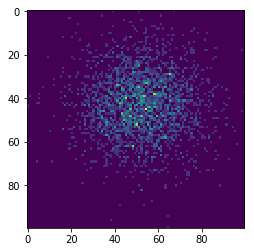

In [85]:
plt.imshow(jhist12)
plt.show()

In [87]:
# mis = [mutual_information((np.ravel(dat1), np.ravel(dat2)), k=4),]
#        mutual_information(jhist1),
#        mutual_information(jhist13),
#        mutual_information(jhist14)]

norm_mis = [normalized_mutual_information(dat1, dat1),
            normalized_mutual_information(dat1, dat2),
            normalized_mutual_information(dat1, dat3),
            normalized_mutual_information(dat1, dat4)]

norm_vis = [normalized_variation_of_information(dat1, dat1),
            normalized_variation_of_information(dat1, dat2),
            normalized_variation_of_information(dat1, dat3),
            normalized_variation_of_information(dat1, dat4)]

print("MI:", mis)
print("NMI:", norm_mis)
print("NVI:", norm_vis)

MI: [4.039590033407743, 0.834027099587868, 0.8269223503318048, 0.8111885158793357]
NMI: [1.9999999999999998, 1.8527282074518365, 1.9999999999999998, 1.9999999999999998]
NVI: [2.001092991188066, 1.9216160229486612, 2.001092991188066, 2.001092991188066]


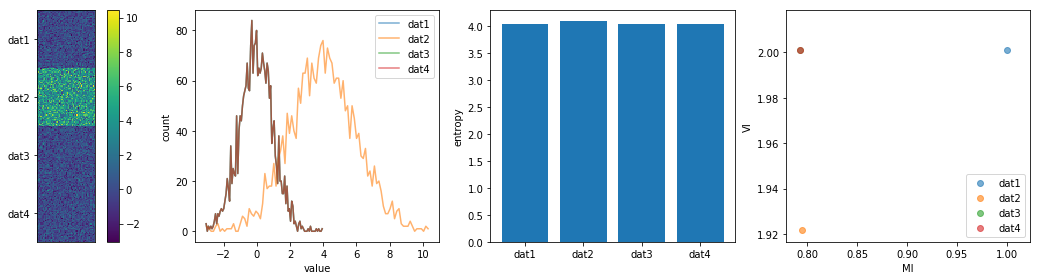

In [60]:
fig = plt.figure(num=1, figsize=(16, 4))
plt.subplot(141)
plt.imshow(dats)
plt.yticks([25, 75, 125, 175], ['dat1', 'dat2', 'dat3', 'dat4'])
plt.xticks([])
plt.colorbar()

plt.subplot(142)
for idx in range(ndats):
    plt.plot(binss[idx], hists[idx], alpha=0.6)

plt.legend(['dat1', 'dat2', 'dat3', 'dat4'])
plt.xlabel('value')
plt.ylabel('count')

plt.subplot(143)
plt.bar(np.arange(len(entrops)), entrops)
plt.xticks([0, 1, 2, 3], ['dat1', 'dat2', 'dat3', 'dat4'])
plt.ylabel('entropy')
plt.tight_layout()

plt.subplot(144)
for idx in range(ndats):
    plt.scatter(norm_mis[idx], norm_vis[idx], alpha=0.6)

plt.legend(['dat1', 'dat2', 'dat3', 'dat4'])
plt.xlabel('MI')
plt.ylabel('VI')
plt.show()

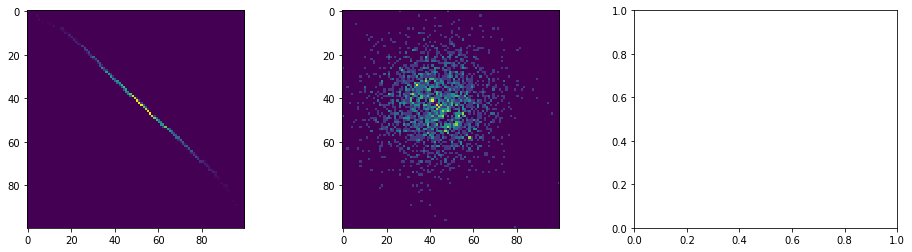

In [61]:
fig = plt.figure(num=1, figsize=(16, 4))
plt.subplot(131)
plt.imshow(np.histogramdd((np.sort(np.ravel(dat1)), np.sort(np.ravel(dat2))), bins = 100)[0])

plt.subplot(132)
plt.imshow(np.histogram2d(np.ravel(dat1), np.ravel(dat4), bins = 100)[0])

plt.subplot(133)

plt.show()

In [ ]:
import os.path as op, os
import numpy as np

from copy import deepcopy

from skimage.measure import compare_ssim as ssim
from skimage.measure import compare_mse as mse
from skimage.measure import compare_nrmse as nrmse
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import rice, norm

In [38]:
from scipy.stats import entropy

